# Conditions aux limites et propagation d'incertidues

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots

## En dimension 1D

In [101]:
t_min = 0
t_max = 2
delta_t = 0.01
delta_x = 0.01
delta_y = 0.01
L = 2
nt = int((t_max-t_min)/delta_t)
nx = int((2*L)/delta_x)
ny = int((2*L)/delta_y)


c = 1
v0 = np.arange(nx) * (np.arange(nx) - nx + 1) / nx ** 2
v0 = np.zeros(nx)

In [102]:
x = np.arange(-L,L,delta_x)
U0 = np.exp(-(x+L/2)**2/0.1)

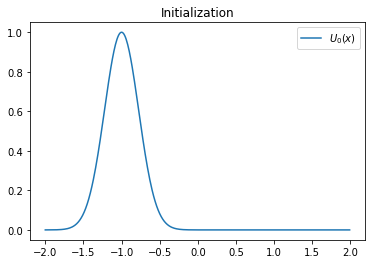

In [103]:
plt.plot(x,U0,label='$U_{0}(x)$')
plt.title('Initialization')
plt.legend()
plt.show()

In [104]:
U = np.zeros((nt,nx))

In [105]:
v1 = (U0[1:]-U0[:-1])/delta_t
v1 = np.append([0],v1)

In [106]:
U[0] = U0
U[1] = U0 + delta_t * v1
for i in range(2,nt):
    U[i,1:-1] = 2*U[i-1,1:-1]-U[i-2,1:-1]+delta_t**2*(c**2*(U[i-1,2:]-2*U[i-1,1:-1]+U[i-1,:-2])/delta_x**2) 
    U[i,0] = U[i-1,0]
    U[i,-1] = U[i-1,-1]
    

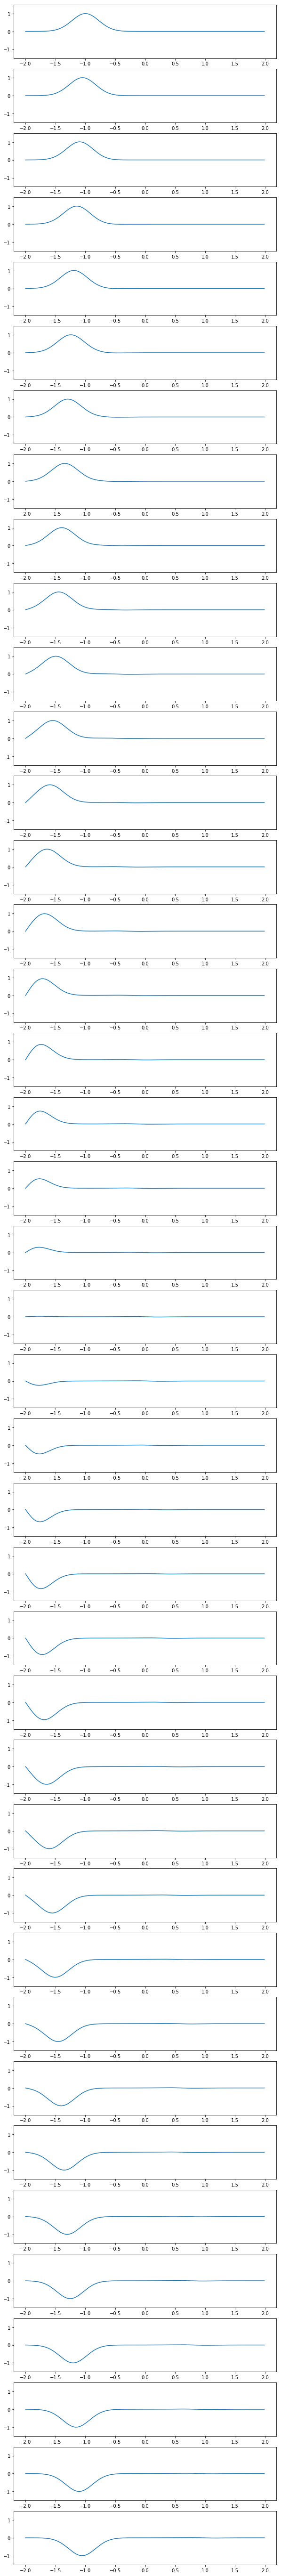

In [61]:
f,axes = plt.subplots(ncols=1,nrows=nt//5,figsize=(10,100))
for i in range(0,nt,5):
    ax = axes[int(i/5)]
    ax.set_ylim([-1.5, 1.5])
    ax.plot(x,U[i])
plt.show()

In [8]:
U = np.zeros((nt,nx))
U[0] = U0
U[1] = U0 + delta_t * v1
E = np.zeros(nt)
Ew = np.zeros(nt)
Ek = np.zeros(nt)
for i in range(2,nt):
    U[i,1:-1] = 2*U[i-1,1:-1]-U[i-2,1:-1]+delta_t**2*(c**2*(U[i-1,2:]-2*U[i-1,1:-1]+U[i-1,:-2])/delta_x**2) 
    U[i,0] = U[i-1,0]
    U[i,-1] = U[i-1,-1]
    V = (U[i,:]-U[i-1,:])/delta_t
    gradient_U = (U[i,1:]-U[i,:-1])/delta_x
    gradient_U = np.append([U[i,0]/delta_x],gradient_U)
    E[i] = 1/2*delta_x*(np.sum(V**2)+c**2*np.sum(gradient_U**2))
    Ew[i] = 1/2*delta_x*(np.sum(V**2))
    Ek[i] = 1/2*delta_x*(c**2*np.sum(gradient_U**2))

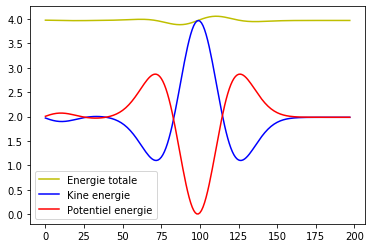

In [9]:
plt.plot(E[2:],'y',label='Energie totale')
plt.plot(Ew[2:],'b',label='Kine energie')
plt.plot(Ek[2:],'r',label='Potentiel energie')
plt.legend()
plt.show()

# En dimension 2D

In [10]:
t_min = 0
t_max = 2
delta_t = 0.01
delta_x = 0.05
delta_y = 0.05
L = 2
nt = int((t_max-t_min)/delta_t)
nx = int((2*L)/delta_x)
ny = int((2*L)/delta_y)


c = 1
v0 = np.arange(nx) * (np.arange(nx) - nx + 1) / nx ** 2
v0 = np.zeros(nx)
# v0[1:] = (U0[1:]-U0[:-1])/
# v0[0] = 0
# v0[-1] = 0

In [11]:
W = np.zeros((nt,nx,ny))
x = np.linspace(-L,L,nx)
y = np.linspace(-L,L,ny)
XX,YY = np.meshgrid(x,y)
from mpl_toolkits.mplot3d import Axes3D

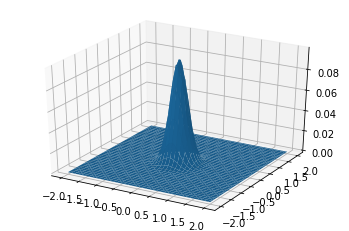

In [41]:
W[0,:,:] = np.exp(-((XX)**2 + (YY)**2)/0.1)/10

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(XX,YY,W[0])
plt.show()

In [47]:

fig = make_subplots(
    rows=1, cols=1,
    specs=[[{'type': 'surface'}]])

fig.add_trace(
    go.Surface(x=XX, y=YY, z=W[0], colorscale='RdBu', showscale=False),
    row=1, col=1)


fig.update_layout(
    title_text='3D subplots with different colorscales',
    height=800,
    width=800
)

fig.show()


In [30]:
V0 = np.zeros((nx,ny))
W[1,:,:] = W[0] + delta_t * V0
for n in range(1, nt-1):
    W[n+1,1:-1,1:-1] = 2*W[n,1:-1,1:-1] - W[n-1,1:-1,1:-1] \
    + delta_t**2 * c**2 *((W[n,2:,1:-1] - 2*W[n,1:-1,1:-1] + W[n,:-2,1:-1])/delta_x**2 \
                       + (W[n,1:-1,2:] - 2*W[n,1:-1,1:-1] + W[n,1:-1,:-2])/delta_y**2)
    W[n+1,[0,-1],:] = W[n,[0,-1],:]
    W[n+1,:,[0,-1]] = W[n,:,[0,-1]]


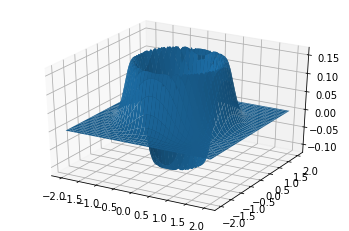

In [31]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(XX,YY,W[100])
plt.show()

In [32]:

fig = make_subplots(
    rows=4, cols=2,
    specs=[[{'type': 'surface'}, {'type': 'surface'}],
           [{'type': 'surface'}, {'type': 'surface'}],
          [{'type': 'surface'}, {'type': 'surface'}],
          [{'type': 'surface'}, {'type': 'surface'}]])

fig.add_trace(
    go.Surface(x=XX, y=YY, z=W[0], colorscale='RdBu', showscale=False),
    row=1, col=1)
fig.add_trace(
    go.Surface(x=XX, y=YY, z=W[20], colorscale='RdBu', showscale=False),
    row=1, col=2)
fig.add_trace(
    go.Surface(x=XX, y=YY, z=W[40], colorscale='RdBu', showscale=False),
    row=2, col=1)
fig.add_trace(
    go.Surface(x=XX, y=YY, z=W[60], colorscale='RdBu', showscale=False),
    row=2, col=2)

fig.add_trace(
    go.Surface(x=XX, y=YY, z=W[80], colorscale='RdBu', showscale=False),
    row=3, col=1)
fig.add_trace(
    go.Surface(x=XX, y=YY, z=W[100], colorscale='RdBu', showscale=False),
    row=3, col=2)
fig.add_trace(
    go.Surface(x=XX, y=YY, z=W[120], colorscale='RdBu', showscale=False),
    row=4, col=1)
fig.add_trace(
    go.Surface(x=XX, y=YY, z=W[-1], colorscale='RdBu', showscale=False),
    row=4, col=2)

fig.update_layout(
    title_text='3D subplots with different colorscales',
    height=800,
    width=800
)
fig.show()


# Conditions aux limites absorbantes 1D

# PML 1D

## Parameter

In [137]:
time_step = 0.1

rho = 1
muy = 1
si  = 1

# la taille de PML
L = 5

# simulation field

x = np.arange(-10,15,0.01)

# Corp domain : -10 ---> 0
# PML domain:    0  ---> 5
# Test after PML: 5 ---> 15


delta_x = 0.01


domain_lenght= x.shape[0]


In [138]:
U0 = np.exp(-(x+9)**2/0.1)

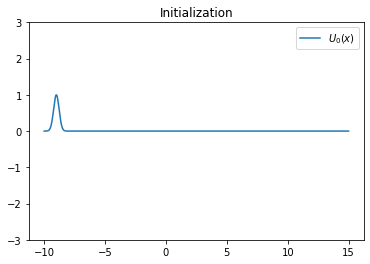

In [139]:
plt.plot(x,U0,label='$U_{0}(x)$')
plt.title('Initialization')
plt.ylim(-3,3)
plt.legend()
plt.show()

In [140]:
U = np.zeros((nt,domain_lenght))

v1 = -(U0[1:]-U0[:-1])/delta_t

v1 = np.append([0],v1)

In [149]:
U[0] = U0

U[1] = U0 + delta_t * v1

In [150]:
for i in range(2,nt):
    U[i,1:-1] = 2*U[i-1,1:-1]-U[i-2,1:-1]+delta_t**2*(c**2*(U[i-1,2:]-2*U[i-1,1:-1]+U[i-1,:-2])/delta_x**2) 
    U[i,0] = U[i-1,0]
    U[i,-1] = U[i-1,-1]
    

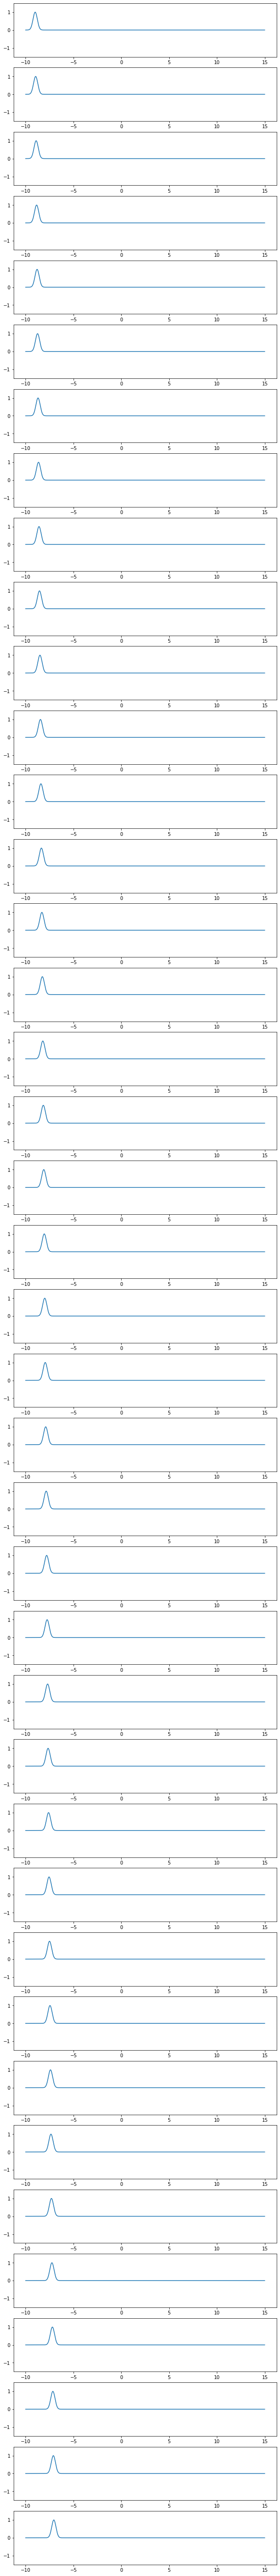

In [151]:
f,axes = plt.subplots(ncols=1,nrows=nt//5,figsize=(10,100))
for i in range(0,nt,5):
    ax = axes[int(i/5)]
    ax.set_ylim([-1.5, 1.5])
    ax.plot(x,U[i])
plt.show()